<a href="https://colab.research.google.com/github/mckolu/DataScience/blob/main/0_DataScienceNotes_ML_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tesla T4
# !nvidia-smi
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9cf27d0f-7087-3ad0-bf03-cdc4ad575c56)


<!-- ML is a subfield of AI and computer science that focuses on the use of data and algorithms to imitate human behavior. ML modelling steps: -->

# 1. Data Retrieval

Import data, check the columns/rows, and decide what to use in your analysis


In [ ]:
import pandas as pd 

dataset = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/6_handling_missing_data_replace/weather_data.csv', 
                  header=0,
                  usecols=['temperature','event', 'windspeed'])
dataset.head() 

temperature     int64
windspeed       int64
event          object
dtype: object

# 2. Data Exploration and Wrangling


In [ ]:
# 1. Select Data: Select the columns that you are interested in
df = dataset[['temperature','event']]

# 2. Preprocess the Data (Wrangling): Remove missing and invalid data points: fillna, dropna, interpolate, replace


# 3. Check the Data Formats: Convert the data points to desired formats: int, string, date
df.dtypes

# 4. Standardize the Data Points: Ensure there can be a meaningful comparison of data points. For example, if a raw data set includes temperature values measured in both Fahrenheit and Celsius, they must all be converted to one or the other before a model can be run effectively.

# 5. Normalize the Data Points: This involves mapping all the nominal data values onto a uniform scale (e.g. from 0 to 1). Making the ranges consistent across variables should help with statistical analysis and ensure fairer comparisons later on.

# 3. Data Preliminary Analysis


<!-- Learn about pivot tables: -->

<!-- <img src='https://f.hubspotusercontent40.net/hubfs/5621549/07-png.png'width=400> -->


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')

groupby_city_df = df.groupby('city') # g is an object with keys and values. key is the city and the values would be the related data

# for city, city_df in g:
#   print (city_df)

groupby_city_df.describe()
groupby_city_df[['temperature']].mean() # The first two rows

# IMPORTANT: Conditional selection of data
# df[]df [] --- first df is for the data we want to show. The second df is for the condition.

df[df.temperature>=32] # all the rows where temperature is greater than 32
df[df.temperature==df['temperature'].max()] # all the rows where the temperature is max
df['day'][df.temperature==df['temperature'].max()] # the day where the temperature is max
df[['day','temperature']][df.temperature==df['temperature'].max()] # the day and the temperature where the temperature is max


# Linear Regression

* Modeling the relationship as a linear equation through recomputing the weights for each feature. 
* Find the relationship between dependent and independent variables. **y = mx+b** m is the coefficient (slope, gradient) and b is the intercept.


Text(0, 0.5, 'price $US')

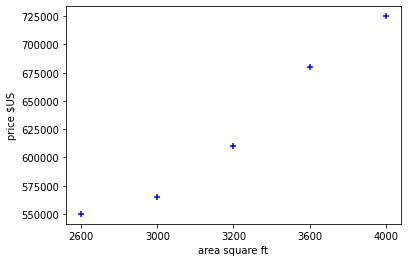

In [ ]:
# Create/Import Data and Visualize

homeprices = [
    {'area': '2600', 'price': 550000},
    {'area': '3000', 'price': 565000},
    {'area': '3200', 'price': 610000},
    {'area': '3600', 'price': 680000},
    {'area': '4000', 'price': 725000}
]

df = pd.DataFrame(data=homeprices, columns=['area','price'])

import matplotlib.pyplot as plt
plt.scatter(df['area'], df['price'], color='blue', marker='+')
plt.xlabel('area square ft')
plt.ylabel('price $US')

* Steps: Square the individual errors, sum them up, and try to minimize the error by taking the derivative of the error iteratively.
* INPUT (independent variables) needs to be 2D (df[[''area]]) and the dependent variable needs to be 1D (df['price']). Predict needs to be the same shape as the input.
* reg.coef_ and reg.intercept_ provide coefficient adn the intercept of the model


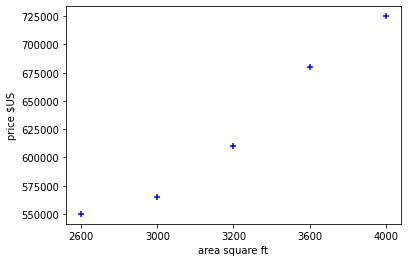

In [ ]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

area = df[['area']].values
price = df['price']

lin_reg.fit(area, price)
# reg.coef_
# reg.intercept_

lin_reg.predict([[3300]])


plt.xlabel('area square ft')
plt.ylabel('price $US')
plt.scatter(df['area'], df['price'], color='blue', marker='+')

In [ ]:
# Exercise
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

lin = linear_model.LinearRegression()

X = data.iloc[:,0:1]
y = data.iloc[:,-1]

lin.fit(X,y)
lin.predict([[2020]])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([41288.69409442])

# Multivariate Linear Regression

In [ ]:
# The same idea

df2 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')

df2.bedrooms = df2.bedrooms.fillna(df2.bedrooms.median())

X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

mv_lin = linear_model.LinearRegression()

mv_lin.fit(X,y)

# mv_lin.coef_
# mv_lin.intercept_

mv_lin.predict([[3000,3,40]]) # 498408.25158031
# mv_lin.predict([[2500,4,5]]) # 578876.03748933


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
# Exercise:

df3 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')

# Pre-processing
import math
df3['test_score(out of 10)'] = df3['test_score(out of 10)'].fillna(math.floor(df3['test_score(out of 10)'].mean()))

df3['experience'] = df3['experience'].fillna('zero')

!pip install word2number
from word2number import w2n
df3['experience'] = df3['experience'].apply(w2n.word_to_num)

df3

X = (df3.iloc[:,:-1])
X
y = df3.iloc[:,-1]

mv2_lin = linear_model.LinearRegression()

mv2_lin.fit(X,y)

mv2_lin.predict(X) 

# mv2_lin.predict([[12,10,10]]) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=f02206696670101c1b127f48c3e367bae7d2930c73d704e620e43b8c2df027a7
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

# Feature Engineering: Converting the categorical variables

## Dummy Variables & One Hot Encoding

There are some cases where LabelEncoder or DictVectorizor are useful, but these are quite limited in my opinion due to ordinality.

LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the *imposed* ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature.



In [ ]:
# One hot encoding, converts the categorical features to a matrix. However, we need to drop the first column of the matrix to avoid milticollinearity (dummy variable trap).
# Modern machine learning algorithms, though, don’t require their inputs to be linearly independent and use methods such as L1 regularization to prune redundant inputs

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.preprocessing import OneHotEncoder
# drop='if_binary': drop a column for feature only having 2 categories
# drop='first': Drop the first column to prevent collinearity

encoder = OneHotEncoder(drop='first', sparse =False, handle_unknown='ignore') 
converted = pd.DataFrame(encoder.fit_transform(X[['town']]), columns=['town_r', 'town_ww']) 

X = pd.concat([X, converted],axis='columns')
X = X.drop(columns=['town'], axis=1)

mv_lin2 = linear_model.LinearRegression()
mv_lin2.fit(X,y)

mv_lin2.predict([[3100,0,0]]) # 498408.25158031

mv_lin2.score(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.9573929037221872

In [ ]:
# Exercise: https://github.com/codebasics/py/blob/master/ML/5_one_hot_encoding/Exercise/exercise_one_hot_encoding.ipynb

df5 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
encoder = OneHotEncoder(sparse =False, handle_unknown='ignore') 
dummy = pd.DataFrame(encoder.fit_transform(df5[['Car Model']]), columns=['Audi A5', 'BMW X5', 'Mercedez']) 

df5 = pd.concat([df5, dummy], axis =1)
# df5
X = df5.drop(columns =['Car Model', 'Audi A5', 'Sell Price($)'])
y = df5['Sell Price($)']

mv_lin4 = linear_model.LinearRegression()
mv_lin4.fit(X,y)

mv_lin4.predict([[86000,7, 1,0]]) 

mv_lin4.score(X,y)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.9417050937281083

# Splitting Training and Testing Data

In [ ]:
df7 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/6_train_test_split/carprices.csv')
# plt.scatter(df7['Mileage'], df7['Sell Price($)'])

X = df7[['Mileage','Age(yrs)']]
y = df7['Sell Price($)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10) # random_state makes sure to generate the same numbers (randomization)
# X_train

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

clf.predict(X_test)

clf.score(X_test, y_test)

0.9212422483776329

# Logistic Regression
Logistic regression is just one step away from reaching Logistic Regression: The activation function(Sigmoid or softmax)

In logistic regression, we decide a probability threshold. If the probability of a particular element is higher than the probability threshold (usually 0.5 for binary classification) then we classify that element in one group or vice versa.

The sigmoid function is used for the two-class logistic regression, whereas the softmax function is used for the multiclass logistic regression (a.k.a. MaxEnt, multinomial logistic regression, softmax Regression, Maximum Entropy Classifier


In [ ]:
df8 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df8.head()



,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


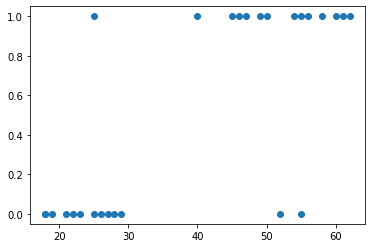

In [ ]:
plt.scatter(df8['age'], df8['bought_insurance'])

In [ ]:
X = df8[['age']]
y = df8['bought_insurance']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=10) # random_state makes sure to generate the same numbers (randomization)
X_test

,age
7,60
5,56
18,19


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.predict(X_test)

log_reg.score(X_test, y_test)

1.0

In [ ]:
log_reg.predict_proba(X_test) # probability for each data point

array([[0.06470723, 0.93529277],
       [0.10327405, 0.89672595],
       [0.92775095, 0.07224905]])

In [ ]:
log_reg.predict([[77]])
log_reg.predict_proba([[77]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.00786933, 0.99213067]])

In [ ]:
# Exercise
# https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/Exercise/7_logistic_regression_exercise.ipynb

df0 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Exploratory Data Analysis

df0.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


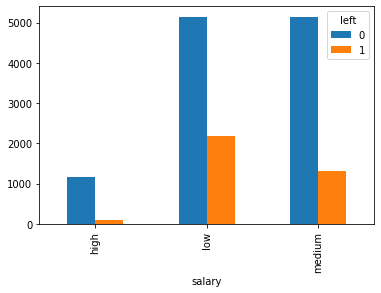

In [ ]:
pd.crosstab(df0.salary,df0.left).plot(kind='bar')

In [ ]:
df0['Department'].unique()

from sklearn.preprocessing import OneHotEncoder

# sparse matrix: A matrix that has been compressed to eliminate zero-values.,
# Dense matrix: bunch of zeros.
# sparse matrices are better for memory and time complexity in general

encoder1 = OneHotEncoder(drop='first', sparse =False, handle_unknown='ignore')  
converted1 = pd.DataFrame(encoder1.fit_transform(df0[['Department']])) 
converted2 = pd.DataFrame(encoder1.fit_transform(df0[['salary']])) 


X = pd.concat([df0, converted1, converted2],axis='columns')
X = X.drop(columns=['left', 'Department', 'salary'], axis=1)
y = df0['left']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10) # random_state makes sure to generate the same numbers (randomization)

log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X_train, y_train)

log_reg2.predict(X_test)

log_reg2.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7893333333333333

#Multiclass Logistic Regression

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
(digits.data[0]).shape

# (digits.data[0]).shape

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

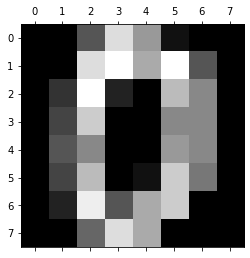

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

# plt.gray() 
# for i in range(5):
#     plt.matshow(digits.images[i]) 

In [ ]:
digits.target[0].shape

()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2, random_state=10) # random_state makes sure to generate the same numbers (randomization)len()
len(X_train)

1437

In [ ]:
log_reg3 = LogisticRegression(max_iter=10000)
log_reg3.fit(X_train, y_train)

# log_reg3.predict(X_test)

log_reg3.score(X_test, y_test)

0.9555555555555556

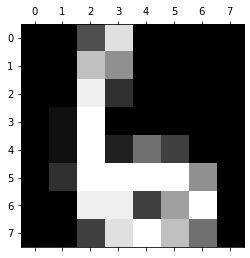

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
digits.target[67]
log_reg3.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
# confusion matrix

y_predicted = log_reg3.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)


confusion_matrix(y_test, y_predicted)


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]])

In [ ]:
# Exercise

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

iris = load_iris()

dir(iris)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iris_logreg = LogisticRegression(max_iter=10000)
iris_logreg.fit(X_train, y_train)

y_predicted = iris_logreg.predict(X_test)

iris_logreg.score(X_test, y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

confusion_matrix(y_test, y_predicted)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
# Exercise 2
# https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python

from keras.datasets import mnist
data = mnist.load_data()
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# dir(mnist)

train_X.shape

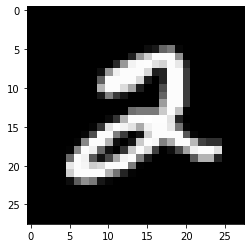

In [ ]:
from matplotlib import pyplot

pyplot.imshow(train_X[5], cmap=pyplot.get_cmap('gray'))
pyplot.show()


# More preprocessing

https://scikit-learn.org/stable/modules/preprocessing.html

# Save a Model with Pickle

In [ ]:
# import pickle

# with open('model_pickle','wb') as file:
#     pickle.dump(mv2_lin,file)

# with open('model_pickle','rb') as file:
#     mp = pickle.load(file)

# mp.predict([[12,10,10]]) 

# Save for later